findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{'policy': 'fcfs', 'stride': ' 4', 'avg_lat': ' 1.25', 'p90_lat': ' 3.024080282763431'}
{'policy': 'fcfs', 'stride': ' 8', 'avg_lat': ' 1.34', 'p90_lat': ' 3.241961309784337'}
{'policy': 'fcfs', 'stride': '16', 'avg_lat': ' 1.35', 'p90_lat': ' 3.318449058030781'}
{'policy': 'fcfs', 'stride': '32', 'avg_lat': ' 1.43', 'p90_lat': ' 3.4480765104293822'}
{'policy': 'merge', 'stride': ' 4', 'avg_lat': ' 2.28', 'p90_lat': ' 6.2794834700497715'}
{'policy': 'merge', 'stride': ' 8', 'avg_lat': ' 1.53', 'p90_lat': ' 4.609651255607605'}
{'policy': 'merge', 'stride': '16', 'avg_lat': ' 1.12', 'p90_lat': ' 3.101725071668625'}
{'policy': 'merge', 'stride': '32', 'avg_lat': ' 1.06', 'p90_lat': ' 2.7812019044702705'}
{'policy': 'credit', 'stride': ' 4', 'avg_lat': ' 0.58', 'p90_lat': ' 1.2001059095738298'}
{'policy': 'credit', 'stride': ' 8', 'avg_lat': ' 0.68', 'p90_lat': ' 1.6148380092952563'}
{'policy': 'credit', 'stride': '16', 'avg_lat': ' 0.72', 'p90_lat': ' 1.6305956095457077'}
{'policy': 'cred

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

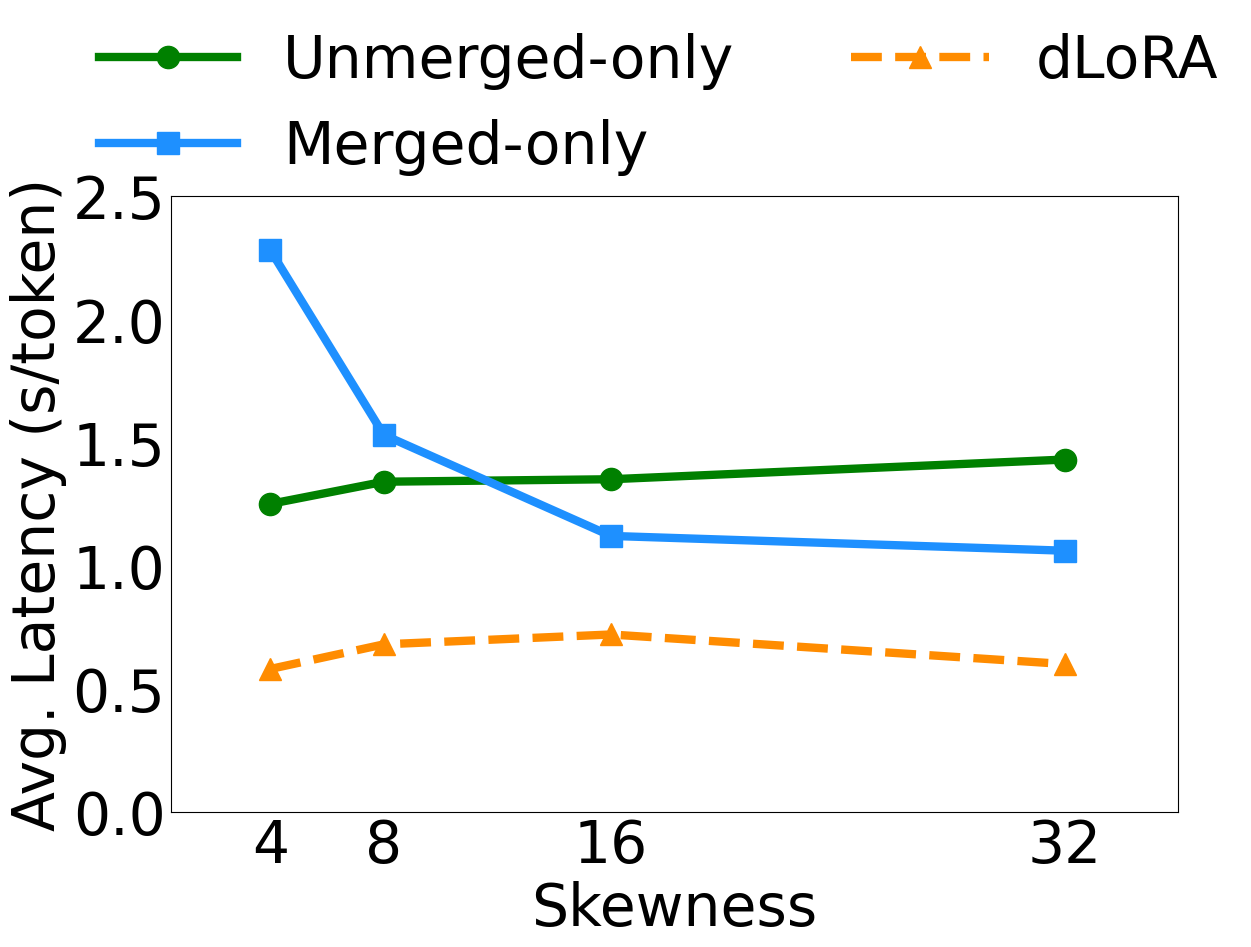

In [12]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_subfigs = 1
num_curves = 3

policy_dict = {
    "fcfs": 0,
    "merge": 1,
    "credit": 2,
}

skewness_dict = {0: [], 1: [], 2: []}
avg_latency_dict = {0: [], 1: [], 2: []}

file_path = "./fig10.csv"
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        print(row)
        policy = policy_dict[row['policy']]
        skewness = int(row['stride'])
        avg_latency = float(row['avg_lat'])
        skewness_dict[policy].append(skewness)
        avg_latency_dict[policy].append(avg_latency)

# Set font and figure size
font_size = 42
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)

fig_size = (13, 8)
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

colors = {0: 'green', 1: 'dodgerblue', 2: 'darkorange'}
labels = {0: 'Unmerged-only',  1: 'Merged-only', 2: 'dLoRA'}
markers = {0: 'o', 1: 's', 2: '^'}
linestyles = {0: 'solid', 1: 'solid', 2: '--'}

# x-axis setting
x_label = 'Skewness'
x_ticks = [4, 8, 16, 32]

# y-axis setting
y_label = 'Avg. Latency (s/token)'
y_ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5]

axes.set_xlabel(x_label)
axes.set_xlim(left=0.5, right=36)
axes.get_xaxis().set_tick_params(direction='in', pad=7)
axes.get_xaxis().set_tick_params(which='minor', direction='in')
axes.set_xticks(x_ticks)

axes.set_ylabel(y_label)
axes.set_ylim(bottom=0, top=2)
axes.set_yticks(y_ticks)
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_xaxis().set_tick_params(direction='in', pad=4)
axes.tick_params(bottom=False, top=False, left=False, right=False)
axes.minorticks_off()

lines = [[] for i in range(num_curves)]
for i in range(num_curves):
    lines[i], = axes.plot(
        skewness_dict[i],
        avg_latency_dict[i],
        label=labels[i],
        marker = markers[i],
        color=colors[i],
        lw=6,
        markersize=16,
        linestyle=linestyles[i],
        zorder=3
    )

fig.legend(handles=[lines[0], lines[1], lines[2]], handlelength=2.36, 
           ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, prop={'size':font_size})

file_path = './figure10a.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

{'policy': 'fcfs', 'stride': ' 4', 'avg_lat': ' 1.25', 'p90_lat': ' 3.024080282763431'}
{'policy': 'fcfs', 'stride': ' 8', 'avg_lat': ' 1.34', 'p90_lat': ' 3.241961309784337'}
{'policy': 'fcfs', 'stride': '16', 'avg_lat': ' 1.35', 'p90_lat': ' 3.318449058030781'}
{'policy': 'fcfs', 'stride': '32', 'avg_lat': ' 1.43', 'p90_lat': ' 3.4480765104293822'}
{'policy': 'merge', 'stride': ' 4', 'avg_lat': ' 2.28', 'p90_lat': ' 6.2794834700497715'}
{'policy': 'merge', 'stride': ' 8', 'avg_lat': ' 1.53', 'p90_lat': ' 4.609651255607605'}
{'policy': 'merge', 'stride': '16', 'avg_lat': ' 1.12', 'p90_lat': ' 3.101725071668625'}
{'policy': 'merge', 'stride': '32', 'avg_lat': ' 1.06', 'p90_lat': ' 2.7812019044702705'}
{'policy': 'credit', 'stride': ' 4', 'avg_lat': ' 0.58', 'p90_lat': ' 1.2001059095738298'}
{'policy': 'credit', 'stride': ' 8', 'avg_lat': ' 0.68', 'p90_lat': ' 1.6148380092952563'}
{'policy': 'credit', 'stride': '16', 'avg_lat': ' 0.72', 'p90_lat': ' 1.6305956095457077'}
{'policy': 'cred

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

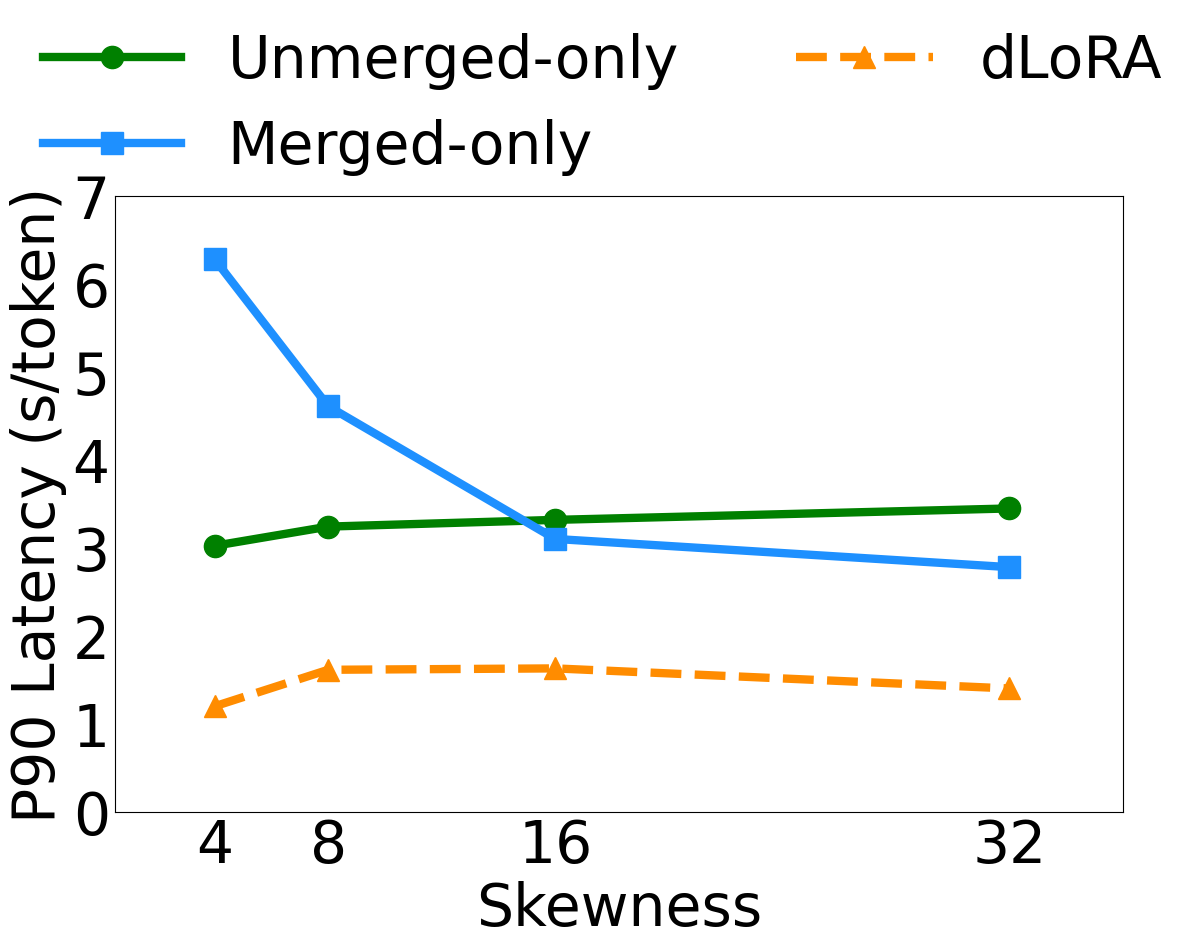

In [13]:
%matplotlib inline
import os
import sys
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

# constants
num_subfigs = 1
num_curves = 3

skewness_dict = {0: [], 1: [], 2: []}
p90_latency_dict = {0: [], 1: [], 2: []}

file_path = "./fig10.csv"
with open(file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        print(row)
        policy = policy_dict[row['policy']]
        skewness = int(row['stride'])
        p90_latency = float(row['p90_lat'])
        skewness_dict[policy].append(skewness)
        p90_latency_dict[policy].append(p90_latency)

skewness = [1, 2, 4, 8, 16, 32]


# Set font and figure size
font_size = 42
plt.rc('font',**{'size': font_size, 'family': 'Arial'})
plt.rc('pdf',fonttype = 42)

fig_size = (13, 8)
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=fig_size)
matplotlib.rcParams['xtick.minor.size'] = 4.
matplotlib.rcParams['xtick.major.size'] = 8.
matplotlib.rcParams['ytick.major.size'] = 6.
matplotlib.rcParams['ytick.minor.visible'] = False
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

colors = {0: 'green', 1: 'dodgerblue', 2: 'darkorange'}
labels = {0: 'Unmerged-only',  1: 'Merged-only', 2: 'dLoRA'}
markers = {0: 'o', 1: 's', 2: '^'}
linestyles = {0: 'solid', 1: 'solid', 2: '--'}

# x-axis setting
x_label = 'Skewness'
x_ticks = [4, 8, 16, 32]

# y-axis setting
y_label = 'P90 Latency (s/token)'
y_ticks = [i for i in range(0, 8)]

axes.set_xlabel(x_label)
axes.set_xlim(left=0.5, right=36)
axes.get_xaxis().set_tick_params(direction='in', pad=7)
axes.get_xaxis().set_tick_params(which='minor', direction='in')
axes.set_xticks(x_ticks)

axes.set_ylabel(y_label)
axes.set_ylim(bottom=0, top=2)
axes.set_yticks(y_ticks)
axes.get_yaxis().set_tick_params(direction='in', pad=4)
axes.get_xaxis().set_tick_params(direction='in', pad=4)
axes.tick_params(bottom=False, top=False, left=False, right=False)
axes.minorticks_off()

lines = [[] for i in range(num_curves * 1)]
for i in range(num_curves):
    lines[i], = axes.plot(
        skewness_dict[i],
        p90_latency_dict[i],
        label=labels[i],
        marker = markers[i],
        color=colors[i],
        lw=6,
        markersize=16,
        linestyle=linestyles[i],
        zorder=3
    )

fig.legend(handles=[lines[0], lines[1], lines[2]], handlelength=2.36, 
           ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1.15), frameon=False, prop={'size':font_size})

file_path = './figure10b.pdf'
plt.savefig(file_path, bbox_inches='tight', transparent=True)